# Malignant Comments Classifier 

# Problem Statement:
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_data.csv')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'], object: ['id', 'comment_text']}

In [4]:
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [4]:
dft = pd.read_csv('test_data.csv')
dft

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
dft.isnull().sum()

id              0
comment_text    0
dtype: int64

In [7]:
Categorical = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [8]:
for i in df.columns[2:]:
    print(df[i].value_counts())
    print('______________________*****_________________________')

0    144277
1     15294
Name: malignant, dtype: int64
______________________*****_________________________
0    157976
1      1595
Name: highly_malignant, dtype: int64
______________________*****_________________________
0    151122
1      8449
Name: rude, dtype: int64
______________________*****_________________________
0    159093
1       478
Name: threat, dtype: int64
______________________*****_________________________
0    151694
1      7877
Name: abuse, dtype: int64
______________________*****_________________________
0    158166
1      1405
Name: loathe, dtype: int64
______________________*****_________________________


From the above observations, we can see that its an imbalanced dataset and we need to handle them

## Exploratory Data Analysis (EDA)

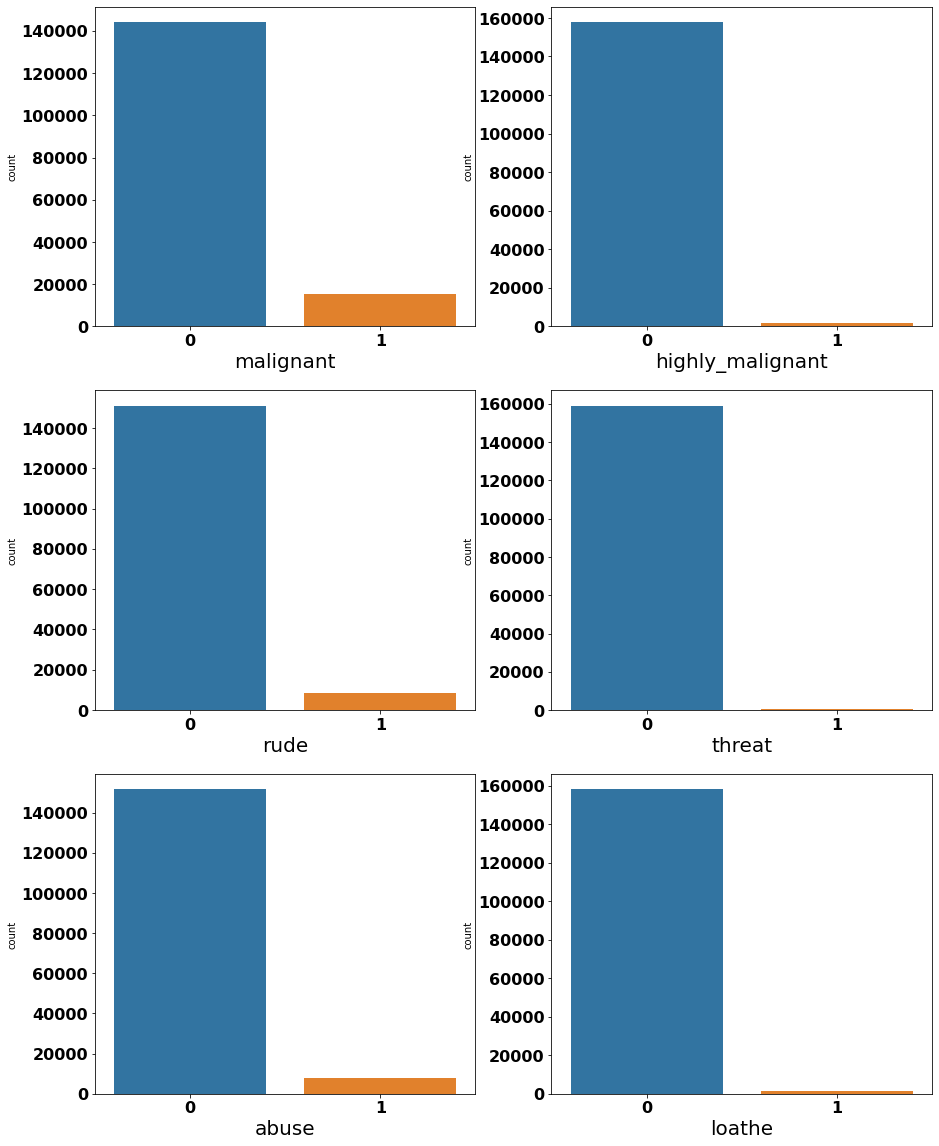

In [9]:
categories = df.columns[2:]
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1
for col in categories:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=20)
        plt.xticks(fontsize=16,fontweight = 'bold')
        plt.yticks(fontsize=16,fontweight = 'bold')
    plotnumber +=1
plt.show()

we can see that there only mimimum number of columns in 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe' and remaining all in 0.

In [10]:
comments = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]
percent=len(comments)/len(df)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


Around 90% comments are Good/Neutral in nature while rest 10% comments are Negative in nature.

In [11]:
count = df.iloc[:,2:].sum()
count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

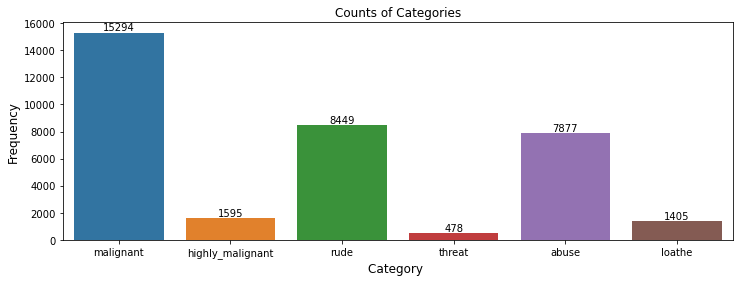

In [12]:
plt.figure(figsize=(12,4))
ax = sns.barplot(count.index, count.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

We can see malignant and rude are high catogorised sentences in the data

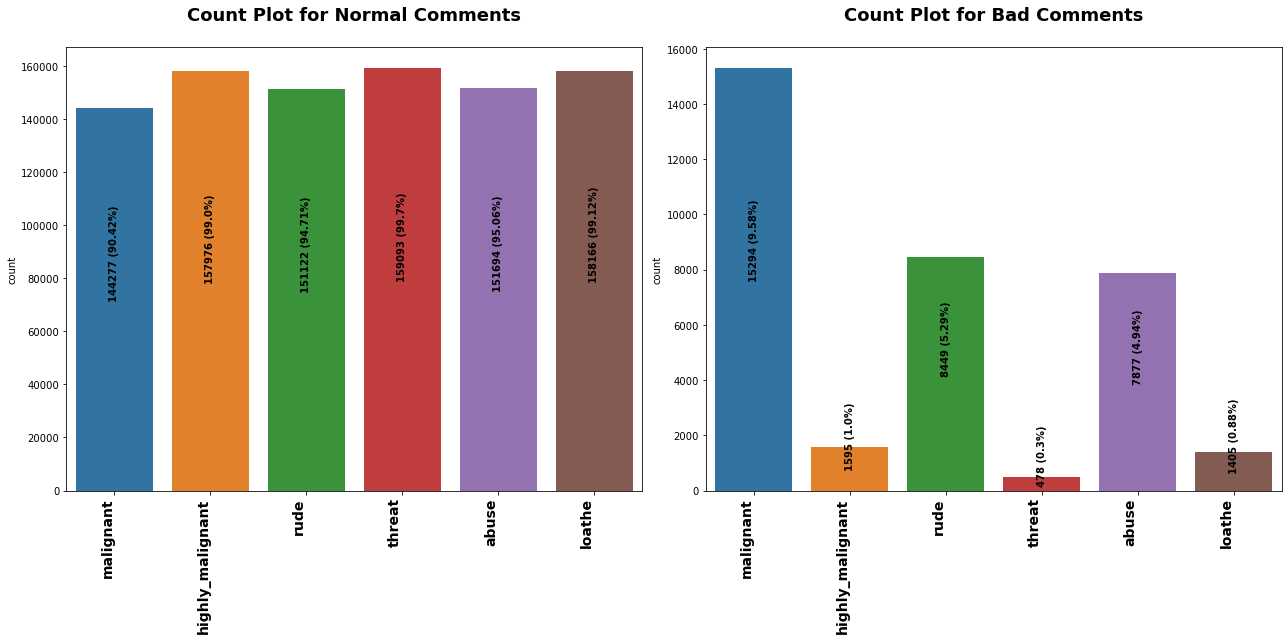

In [13]:
fig, ax = plt.subplots(1,2,figsize=(18,9))

for i in range(2):
    sns.countplot(data=df[df.columns[2:]][df[df.columns[2:]]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n", fontsize=18, fontweight='bold')
    else:
        ax[i].set_title("Count Plot for Bad Comments\n", fontsize=18, fontweight='bold')
        
    ax[i].set_xticklabels(df.columns[2:], rotation=90, ha="right", fontsize=14, fontweight='bold')
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1
plt.tight_layout()
plt.show()

In [14]:
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
distribution = df[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')
distribution

,count
threat,478
loathe,1405
highly_malignant,1595
abuse,7877
rude,8449
malignant,15294


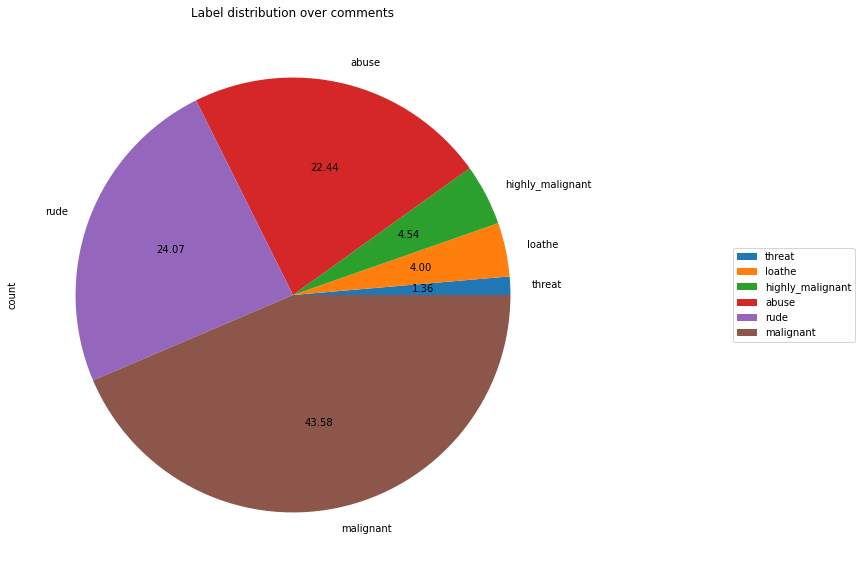

In [15]:
distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (20, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5));

As we see above malignant, and rude senterence are high classified and threat, loathe are least classified.

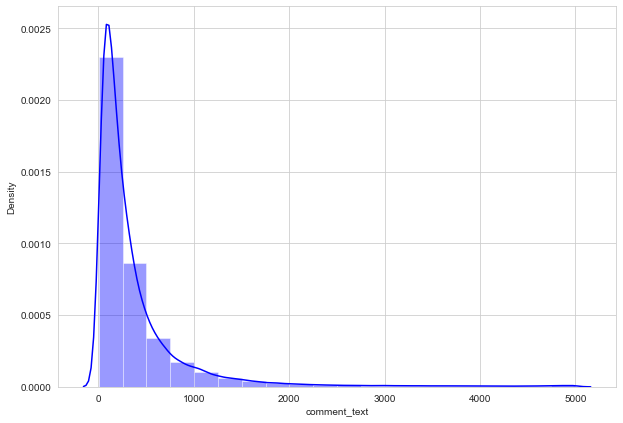

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue');

we can see that few senterences are really long but most of the senterence are small.

In [17]:
corr=df.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


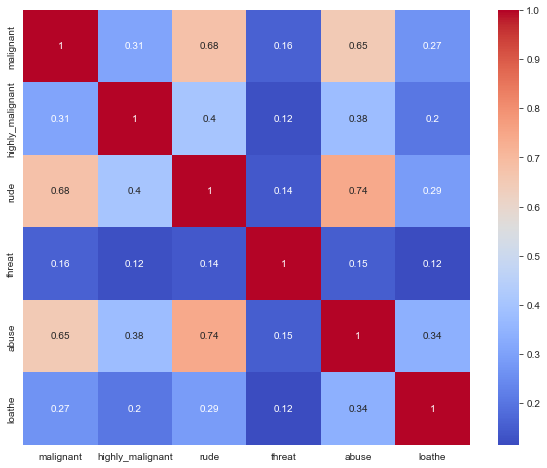

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap= "coolwarm")
plt.show()

- We can see more corelations in the variables, Abuse have more corelation with malignant and rude.
- Rude has more postive corelation with malignant
- we dont have any negative corellations in the data.

## Data pre-processing

In [19]:
df.drop('id',axis=1,inplace=True)
dft.drop('id',axis=1,inplace=True)

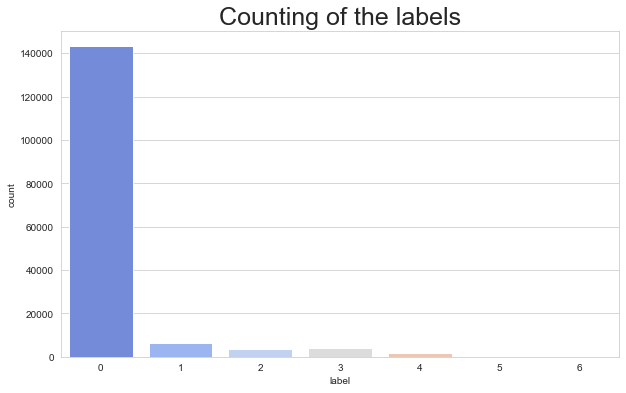

In [20]:
df['label']=df[Categorical].sum(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(df['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

###### Feature Extraction for length before cleaning in training dataset.

In [21]:
df['length_before_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


##### Feature Extraction for length before cleaning in testing dataset.

In [22]:
dft['length_before_cleaning'] = dft['comment_text'].map(lambda comment_text: len(comment_text))
dft

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== Throw from out field to home plate. == \n\n...,198
153161,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,""" \n\n == """"One of the founding nations of the...",502


## **Text Mining**

**Operation perform are as followed:**

- **Removing Punctuations and other special characters**

- **Word Tokenzation**

- **Removing Stop Words**

- **Stemming and Lemmatising**

- **Applying Count Vectoriser**

In [23]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
df['comment_text'] = df['comment_text'].replace('\n',' ')

In [26]:
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [27]:
df['comment_text'] = df['comment_text'].apply(clean_comments)
df['comment_text'].head()

0    explanation edits made username hardcore metal...
1    aww match background colour seemingly stuck th...
2    hey man really trying edit war guy constantly ...
3    make real suggestion improvement wondered sect...
4                        sir hero chance remember page
Name: comment_text, dtype: object

In [28]:
df['length_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,length_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29


We can see that nearly half of the text has been removed from the comment_text after using required pre-processing.

In [29]:
print("Original Length:", df.length_before_cleaning.sum())
print("Cleaned Length:", df.length_after_cleaning.sum())
print("Total Words Removed:", (df.length_before_cleaning.sum()) - (df.length_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [30]:
dft['comment_text'] = dft['comment_text'].apply(clean_comments)
dft['comment_text'].head()

0    yo bitch ja rule succesful ever whats hating s...
1                                   rfc title fine imo
2                           source zawe ashton lapland
3    look back source information updated correct f...
4                             anonymously edit article
Name: comment_text, dtype: object

In [31]:
dft['length_after_cleaning'] = dft['comment_text'].map(lambda comment_text: len(comment_text))
dft.head()

,comment_text,length_before_cleaning,length_after_cleaning
0,yo bitch ja rule succesful ever whats hating s...,367,235
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [32]:
print('Original Length:',dft.length_before_cleaning.sum())
print('Clean Length:',dft.length_after_cleaning.sum())
print("Total Words Removed:", (dft.length_before_cleaning.sum()) - (dft.length_after_cleaning.sum()))

Original Length: 55885733
Clean Length: 34282033
Total Words Removed: 21603700


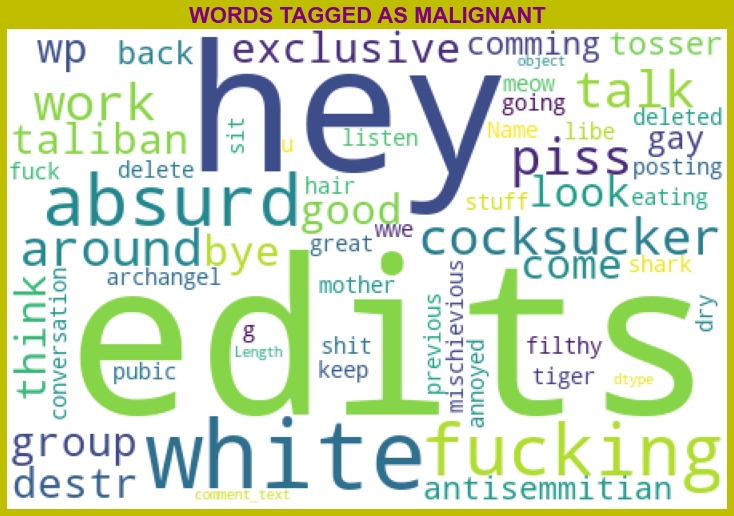

In [33]:
df_malignant=df[(df['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

We can see the foul words that are mostly used in malignant classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

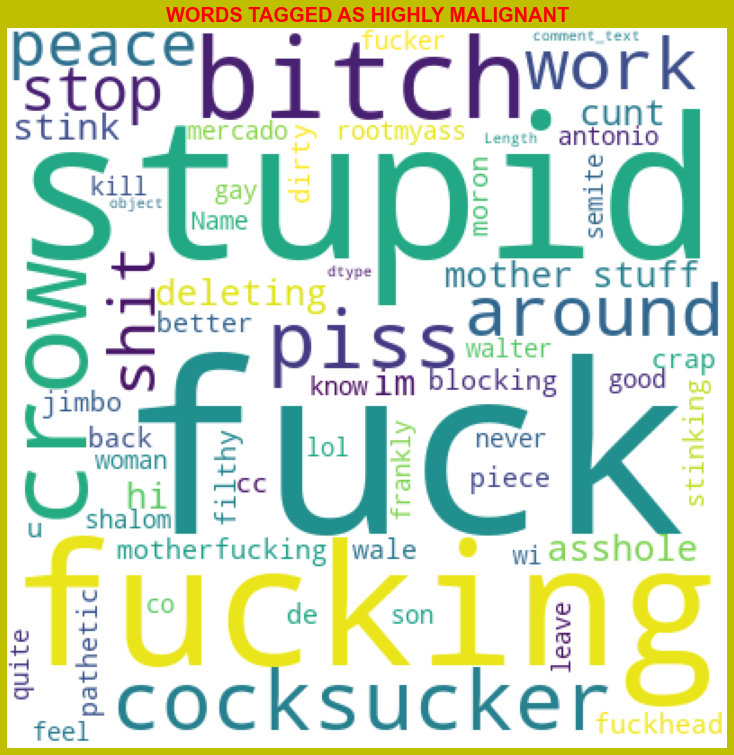

In [34]:
df_highlymalignant=df[(df['highly_malignant']==1)]

wordcloud=WordCloud(height=400,width=400,max_words=400,background_color="white").generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':20, 'fontweight':'bold', 'color':'red'})
plt.show()

We can see the foul words that are mostly used in highly_malignant classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

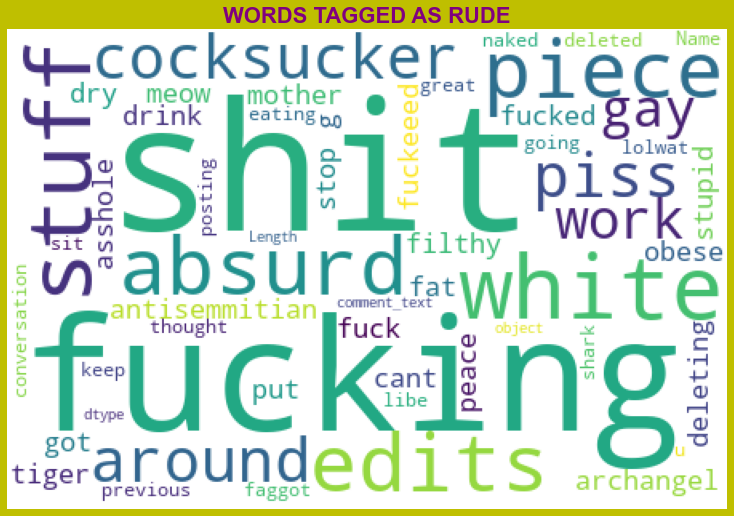

In [35]:
df_rude=df[(df['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

We can see the foul words that are mostly used in Rude classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

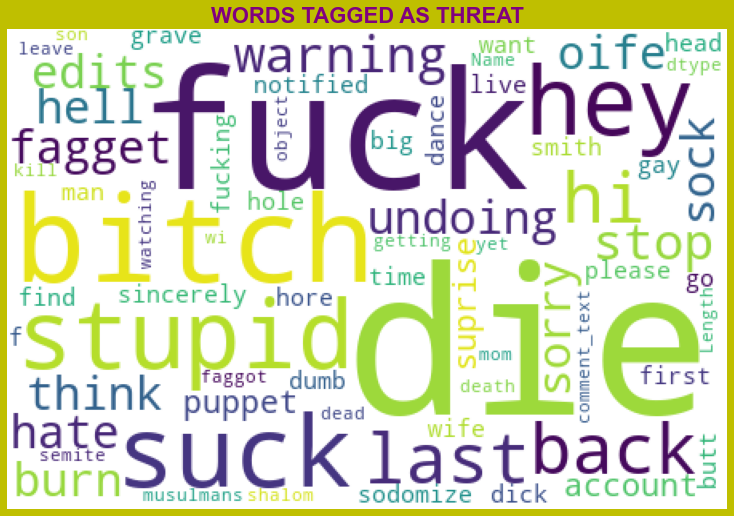

In [37]:
df_threat=df[(df['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

We can see the foul words that are mostly used in threat classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

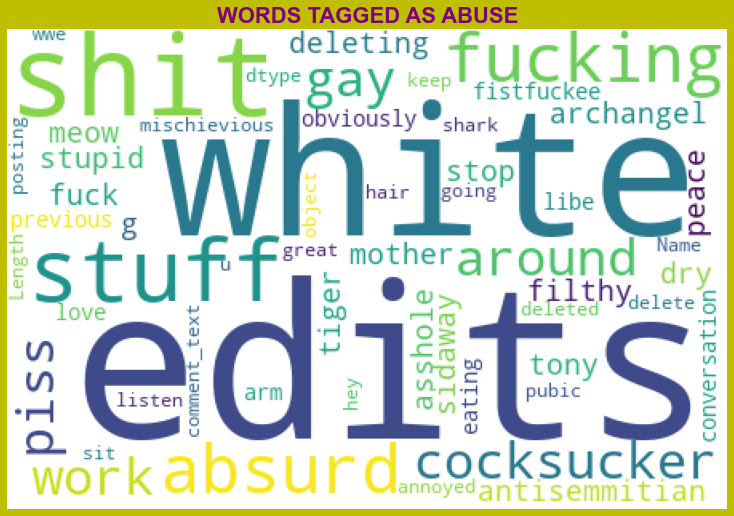

In [38]:
df_abuse=df[(df['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

We can see the foul words that are mostly used in abuse classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

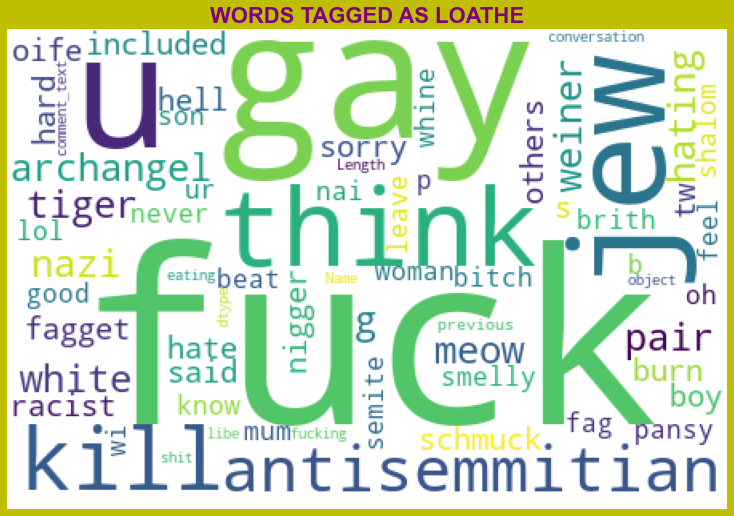

In [39]:
df_loathe=df[(df['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

We can see the foul words that are mostly used in loathe classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

In [40]:
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [41]:
X = tf_vec.fit_transform(df['comment_text'])

In [42]:
Y =df['label']

## Finding the best random state

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    LRR = LogisticRegression()
    LRR.fit(X_train,Y_train)
    predLRR = LRR.predict(X_test)
    acc = accuracy_score(Y_test,predLRR)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

Best Accuracy is 0.9226478943850267 on Random_state 150


### Train Test Split

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

# Prediction
predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
# Accuracy Score
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
# Confusion Matrix
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predLOR)) 

R2 Score : 0.6070042444629533
Mean Absolute Error(MAE) 0.11311413770053476
Mean Squared Error 0.20853526069518716
Root Mean Squared Error 0.45665661135604635
-----------------------------------------------------
0.9226478943850267
-----------------------------------------------------
[[43035   104    11     4     0     0     0]
 [ 1432   273    54    82     5     0     0]
 [  477   221   114   212    12     0     0]
 [  273   165   120   651    56     0     0]
 [   52    56    26   237    95     2     0]
 [    7     6     6    34    40     1     0]
 [    1     0     0     2     6     0     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43154
           1       0.33      0.15      0.20      1846
           2       0.34      0.11      0.17      1036
           3       0.53      0.51      0.52      1265
           4       0.44      0.20      0.28       468
           5       0

## Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Checking accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

# [Prediction]
predDTC = DTC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predDTC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predDTC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predDTC)) 

R2 Score: 0.5077613014890081
Mean Absolute Error 0.14275568181818182
Mean Squared Error 0.2611965240641711
Root Mean Squared Error 0.5110738929589058
-----------------------------------------------------
Accuracy Score:  0.9011948529411765
-----------------------------------------------------
Confusion Matrix:
 [[41900   913   192   121    24     4     0]
 [ 1068   366   193   184    27     7     1]
 [  317   183   195   271    59    10     1]
 [  194   156   186   559   148    20     2]
 [   35    37    52   218   106    19     1]
 [    8    10     5    26    29    16     0]
 [    1     2     0     4     1     1     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43154
           1       0.22      0.20      0.21      1846
           2       0.24      0.19      0.21      1036
           3       0.40      0.44      0.42      1265
           4       0.27      0.23      0.25   

## Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

# [Prediction]
predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predRFC))

R2 Score: 0.5785028994755926
Mean Absolute Error 0.1186288435828877
Mean Squared Error 0.22365892379679145
Root Mean Squared Error 0.4729259178738161
-----------------------------------------------------
Accuracy Score:  0.9200576537433155
-----------------------------------------------------
Confusion Matrix:
 [[42917   138    47    47     5     0     0]
 [ 1399   173   108   155    11     0     0]
 [  472   110   144   293    17     0     0]
 [  278    73   106   736    65     7     0]
 [   66    23    28   277    71     3     0]
 [    9     5     5    42    29     4     0]
 [    1     0     0     6     2     0     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43154
           1       0.33      0.09      0.15      1846
           2       0.33      0.14      0.20      1036
           3       0.47      0.58      0.52      1265
           4       0.35      0.15      0.21   

## KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predKNN))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predKNN))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predKNN))

R2 Score: 0.18011393363016415
Mean Absolute Error 0.17599014037433156
Mean Squared Error 0.43505598262032086
Root Mean Squared Error 0.6595877368632022
-----------------------------------------------------
Accuracy Score:  0.9075451203208557
-----------------------------------------------------
Confusion Matrix:
 [[43043    54    38    18     0     1     0]
 [ 1702    75    37    32     0     0     0]
 [  829    41    74    81    11     0     0]
 [  901    30    78   203    53     0     0]
 [  292    14    37    73    50     2     0]
 [   55     0     6    14    18     1     0]
 [    5     0     0     1     3     0     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43154
           1       0.35      0.04      0.07      1846
           2       0.27      0.07      0.11      1036
           3       0.48      0.16      0.24      1265
           4       0.37      0.11      0.17 

## AdaBoost Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

# [Prediction]
predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predADA))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predADA))

R2 Score: 0.3402174834417607
Mean Absolute Error 0.15478776737967914
Mean Squared Error 0.35010026737967914
Root Mean Squared Error 0.5916927136442354
-----------------------------------------------------
Accuracy Score:  0.9115140374331551
-----------------------------------------------------
Confusion Matrix:
 [[43088     7     4    52     1     2     0]
 [ 1740    12     0    90     1     3     0]
 [  789     9     2   227     7     2     0]
 [  729     7     3   477    38    11     0]
 [  165     0     1   234    52    15     1]
 [   30     1     1    42    15     5     0]
 [    1     0     0     4     1     3     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43154
           1       0.33      0.01      0.01      1846
           2       0.18      0.00      0.00      1036
           3       0.42      0.38      0.40      1265
           4       0.45      0.11      0.18  

## Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,Y_train)

# [Prediction]
predGBC = GBC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGBC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGBC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGBC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGBC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predGBC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predGBC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predGBC))

R2 Score: 0.4596554401981866
Mean Absolute Error 0.13615474598930483
Mean Squared Error 0.28672292780748665
Root Mean Squared Error 0.5354651508805094
-----------------------------------------------------
Accuracy Score:  0.9157336229946524
-----------------------------------------------------
Confusion Matrix:
 [[43083    25    22     7     0    10     7]
 [ 1670    72    42    56     4     2     0]
 [  687    77    53   194    20     3     2]
 [  452   104    77   539    80    12     1]
 [  109    42    19   210    78     9     1]
 [   18     3     3    26    31    12     1]
 [    2     0     0     2     4     0     1]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43154
           1       0.22      0.04      0.07      1846
           2       0.25      0.05      0.08      1036
           3       0.52      0.43      0.47      1265
           4       0.36      0.17      0.23  

## XGBClassifier

In [51]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)

# [Prediction]
predXGB = XGB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predXGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predXGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predXGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predXGB)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predXGB))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predXGB))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predXGB))

R2 Score: 0.5773612710161542
Mean Absolute Error 0.11877506684491979
Mean Squared Error 0.22426470588235295
Root Mean Squared Error 0.47356594670895935
-----------------------------------------------------
Accuracy Score:  0.9202665441176471
-----------------------------------------------------
Confusion Matrix:
 [[43045    79    16    13     0     1     0]
 [ 1510   176    60    88    12     0     0]
 [  517   150   110   238    20     1     0]
 [  306   145   102   603    97    12     0]
 [   60    42    27   213   112    14     0]
 [    9     8     5    27    36     9     0]
 [    1     0     0     3     4     1     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43154
           1       0.29      0.10      0.14      1846
           2       0.34      0.11      0.16      1036
           3       0.51      0.48      0.49      1265
           4       0.40      0.24      0.30 

## Support Vector Machine classifier

In [52]:
from sklearn.svm import SVC

# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(X_train,Y_train)

# [Prediction]
predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predsvc))

R2 Score: 0.6024377306251993
Mean Absolute Error 0.11336480614973261
Mean Squared Error 0.21095838903743316
Root Mean Squared Error 0.45930206731238776
-----------------------------------------------------
Accuracy Score:  0.9228567847593583
-----------------------------------------------------
Confusion Matrix:
 [[43068    68    14     4     0     0     0]
 [ 1495   204    49    94     4     0     0]
 [  513   165   104   244    10     0     0]
 [  296   114    95   698    62     0     0]
 [   56    43    19   244   104     2     0]
 [   10     3     6    32    42     1     0]
 [    1     0     0     2     6     0     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43154
           1       0.34      0.11      0.17      1846
           2       0.36      0.10      0.16      1036
           3       0.53      0.55      0.54      1265
           4       0.46      0.22      0.30 

## Extra Trees Classifier

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

# Checking accuracy for Support Vector Machine Classifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

# [Prediction]
predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETC))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
# Accuracy Score
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("-----------------------------------------------------")
# Confusion Matrix
print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")
# Classification Report
print(classification_report(Y_test,predETC))

R2 Score: 0.5590164826679358
Mean Absolute Error 0.12103108288770054
Mean Squared Error 0.23399899732620322
Root Mean Squared Error 0.4837344285103172
-----------------------------------------------------
Accuracy Score:  0.9200785427807486
-----------------------------------------------------
Confusion Matrix:
 [[42942   131    49    31     1     0     0]
 [ 1430   175    93   134    14     0     0]
 [  514    90   141   273    18     0     0]
 [  327    70   102   692    69     5     0]
 [   75    24    26   246    92     5     0]
 [   14     3     5    40    28     4     0]
 [    1     0     0     4     4     0     0]]
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43154
           1       0.35      0.09      0.15      1846
           2       0.34      0.14      0.19      1036
           3       0.49      0.55      0.52      1265
           4       0.41      0.20      0.27  

## Cross Validation Score

In [54]:
from sklearn.model_selection import cross_val_score

#cv score for Logistic Regression
print('Logistic Regression',cross_val_score(LOR,X,Y,cv=3).mean())

# cv score for Decision Tree Classifier
print('Decision Tree Classifier',cross_val_score(DTC,X,Y,cv=3).mean())

# cv score for KNeighbors Classifier
print('KNeighbors Classifier',cross_val_score(KNN,X,Y,cv=3).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier',cross_val_score(ETC,X,Y,cv=3).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=3).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=3).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier',cross_val_score(XGB,X,Y,cv=3).mean())

# cv score for Support Vector  Classifier
print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=3).mean())

Logistic Regression 0.9193713155476816
Decision Tree Classifier 0.8997938202927812
KNeighbors Classifier 0.9043309854889845
Extra Trees Classifier 0.9162504441860442
AdaBoosting Classifier: 0.9076649318396766
Random Forest Classifier 0.917347134255539
Gradient Boosting Classifier 0.9176228802579659



KeyboardInterrupt



## Hyperparameter Tuning

In [65]:
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [67]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=3)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [68]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': 1,
 'random_state': 10}

In [69]:
Malignant=ExtraTreesClassifier(criterion='gini', max_depth=10, n_estimators=50, n_jobs=1, random_state=10)
Malignant.fit(X_train, Y_train)
pred = Malignant.predict(X_test)
acc=accuracy_score(Y_test,pred)
print('After HyperParameter tuning we have received an accuracy score of',acc*100)

After HyperParameter tuning we have received an accuracy score of 90.14455213903744


## Saving the Model

In [73]:
import joblib
joblib.dump(Malignant,"Prediction_Malignant.pkl")

['Prediction_Malignant.pkl']

## Predicting the saved model

In [74]:
# Loading the saved model
model=joblib.load("Prediction_Malignant.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
47867,0,0
47868,0,0
47869,0,0
47870,0,0


In [79]:
df_test=pd.read_csv("test_data.csv")
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [80]:
df_test.drop('id',axis=1,inplace=True)
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [81]:
X_test = tf_vec.fit_transform(df_test['comment_text'])

In [83]:
Malignant_classifier= joblib.load('Prediction_Malignant.pkl')
predi= Malignant_classifier.predict(X_test)

In [84]:
Predicted=pd.DataFrame({"Prediction_Malignant":predi})
Predicted.head()

,Prediction_Malignant
0,0
1,0
2,0
3,0
4,0


In [85]:
Predicted.value_counts()

Prediction_Malignant
0                       153164
dtype: int64

In [86]:
Predicted.to_csv("Malignant_classifier_Predicted.csv")